# Toffoli gate


Toffoli gate ensures that quantum computers are capable of performing any computation which a classica (and deterministic) computer can do.

It implements the logic NAND port.

In [ ]:
# Write the requirements
!echo "" > requirements.txt
!echo "qiskit[all]~=2.0" >> requirements.txt
!echo "qiskit-ibm-runtime~=0.37" >> requirements.txt
!echo "qiskit-aer~=0.17" >> requirements.txt
!cat requirements.txt

# Install the notebook requirements
!pip install -q -r requirements.txt

import qiskit
import qiskit_ibm_runtime
import qiskit_aer

# Log package versions
print(f"qiskit version: {qiskit.__version__}")
print(f"qiskit-ibm-runtime version: {qiskit_ibm_runtime.__version__}")
print(f"qiskit-aer version: {qiskit_aer.__version__}")


qiskit[all]~=2.0
qiskit-ibm-runtime~=0.37
qiskit-aer~=0.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.2 MB/s eta

Before run this part:

1. Go to <https://quantum.ibm.com/> and copy the token
2. Open the secret tab here on colab on the left.
3. Create a new secret
4. Enable the access of the notebook to the secret

Name: QISKIT_IBM_TOKEN

Value: \<paste-your-token\>

In [ ]:
try:
  from google.colab import userdata

  IN_COLAB = True

except:
  IN_COLAB = False


# if IN_COLAB:
#   token = userdata.get("QISKIT_IBM_TOKEN")
# else:
#   print("This notebook must be run on Colab")


from qiskit_ibm_runtime import QiskitRuntimeService


## Utility Functions

In [ ]:
from math import pi
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector


def probability_dict(qc):
    psi = Statevector(qc)
    proba =  DensityMatrix(psi).probabilities_dict()
    # add 0s if not present
    for i in range(2**len(qc.qubits)):
        # status is a str, with a number of digits equal to the number of qubits
        status = format(i, '0' + str(len(qc.qubits)) + 'b')
        if status not in proba:
            proba[status] = 0.
    return proba


def plot_probability(qc, title="", ax=None):
    legend = [title, ]

    counts = probability_dict(qc)

    plot_histogram(
      [counts, ],
      legend=legend,
      color=['crimson',],
      title=title
    )

    # Bigger labels
    hist = plot_histogram(counts, sort='hamming', ax=ax, target_string='1')

    return hist

def plot_bloch(qc, title="", ax=None):
    psi = Statevector(qc)
    if False: # len(qc.qubits) == 1:
        return plot_bloch_vector(psi, title=title, figsize=(6, 6), ax=ax)
    else:
        return plot_bloch_multivector(psi, title=title, figsize=(6, 6))

## The Algorithm


### Example 1

---





NAND(0, 0) = {'1': 1}
NAND(0, 1) = {'1': 1}
NAND(1, 0) = {'1': 1}
NAND(1, 1) = {'0': 1}


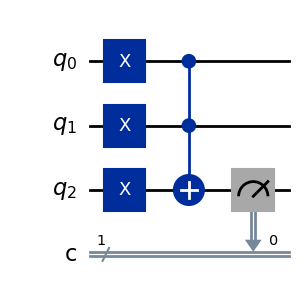

In [ ]:
from qiskit import QuantumCircuit # Import QuantumCircuit directly
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

def nand_circuit(a, b):
    qc = QuantumCircuit(3, 1)

    # Initialize inputs
    if a == 1:
        qc.x(0)
    if b == 1:
        qc.x(1)

    # Set target qubit to |1⟩
    qc.x(2)

    # Apply Toffoli: controls 0 and 1, target 2
    qc.ccx(0, 1, 2)

    # Measure the result
    qc.measure(2, 0)

    # Run simulation using the backend's run method
    backend = Aer.get_backend('qasm_simulator')

    result = backend.run(qc, shots=1).result()
    counts = result.get_counts()

    return qc, counts

qc_ls = []
# Test all input combinations
for a in [0, 1]:
    for b in [0, 1]:
        qc, counts = nand_circuit(a, b)
        qc_ls.append(qc)
        print(f"NAND({a}, {b}) = {counts}")

qc.draw("mpl")

NAND(0, 0) = {'1': 1}
NAND(0, 1) = {'1': 1}
NAND(1, 0) = {'1': 1}
NAND(1, 1) = {'0': 1}



NAND(1, 0) = {'1': 1}


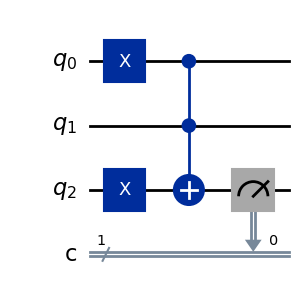

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

def nand_circuit(a, b):
    # Create a quantum circuit with 3 qubits and 1 classical bit
    # Qubit 0 → input a (control 1)
    # Qubit 1 → input b (control 2)
    # Qubit 2 → result (target of the Toffoli gate, initialized to |1⟩)
    qc = QuantumCircuit(3, 1)

    # Initialize inputs a and b:
    # Qubits in Qiskit start in state |0⟩ by default.
    # If input a == 1, we apply an X gate to flip qubit 0 from |0⟩ to |1⟩
    if a == 1:
        qc.x(0)

    # Same for input b → flip qubit 1 from |0⟩ to |1⟩ if needed
    if b == 1:
        qc.x(1)

    # Initialize the target qubit (qubit 2) to |1⟩:
    # This is essential to simulate the NOT-AND (NAND) behavior.
    # The Toffoli gate flips the target only if both controls are |1⟩,
    # so we pre-set the result to 1 and let the Toffoli "turn it off" only when a·b = 1
    qc.x(2)

    # Apply the Toffoli gate (CCX): if both qubit 0 and qubit 1 are |1⟩,
    # then flip qubit 2 → becomes |0⟩. Otherwise, qubit 2 stays |1⟩.
    qc.ccx(0, 1, 2)

    # Measure the result (qubit 2) into classical bit 0
    qc.measure(2, 0)

    # Run the simulation with 1 shot (just want one deterministic output)
    backend = Aer.get_backend('qasm_simulator')
    result = backend.run(qc, shots=1).result()
    counts = result.get_counts()

    return qc, counts

qc_ls = []
# Test all input combinations
for a in [0, 1]:
    for b in [0, 1]:
        qc, counts = nand_circuit(a, b)
        qc_ls.append({"cirquit": qc, "a": a, "b": b, "counts": counts})
        print(f"NAND({a}, {b}) = {counts}")

print("\n\n")
i = 2
print(f"NAND({qc_ls[i]['a']}, {qc_ls[i]['b']}) = {qc_ls[i]['counts']}")
qc = qc_ls[i]["cirquit"]
qc_ls[i]["cirquit"].draw("mpl")